Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv('dataset.csv')

EDA Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [16]:
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [18]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [20]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [22]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [39]:
df.dropna().isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [41]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


In [43]:
df = df[df['adr']<5000]

In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115593.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597.000000,115597
mean,0.369863,105.019594,2016.144753,27.045788,15.770089,0.920768,2.481466,1.846034,0.082678,0.007492,0.032518,0.089803,0.140825,0.217004,2.387640,97.036643,0.059673,0.561675,2016-07-24 13:40:20.128550144
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,2016-01-28 00:00:00
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,2016-07-30 00:00:00
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.370000,0.000000,1.000000,2017-02-02 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,211.030000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482769,107.698911,0.706990,13.751521,8.783471,0.997659,1.905873,0.579323,0.349961,0.095103,0.177372,0.857844,1.521074,0.647200,17.863821,40.614556,0.240109,0.785333,NaN


Data Analysis and Visualizations (Analysis And Findings)

is_canceled
0    0.630137
1    0.369863
Name: proportion, dtype: float64


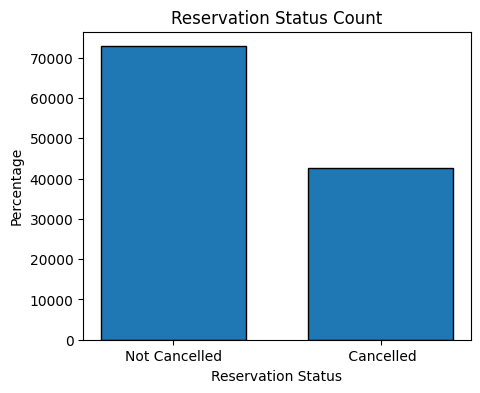

In [50]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled',' Cancelled'],df['is_canceled'].value_counts(),edgecolor = 'k',width = 0.7)
plt.xlabel('Reservation Status')
plt.ylabel('Percentage')
plt.show()

***The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled.There are still 37% of clients who canceled their reservation,which has a significant impact on the hotel's earning.***

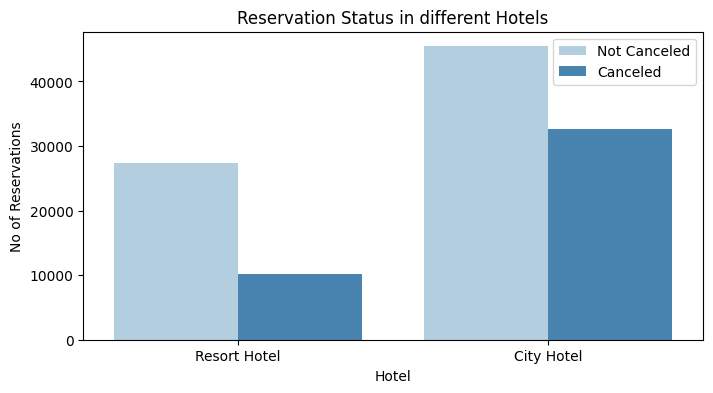

In [99]:
plt.figure(figsize = (8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status in different Hotels')
plt.xlabel('Hotel')
plt.ylabel('No of Reservations')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

***In comparison to resort hotels,city hotels have more bookings.It's possible that resort hotel's are more expensive than thse in cities.***

In [57]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.729877
1,0.270123


In [58]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.582137
1,0.417863


In [59]:
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean()
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean()

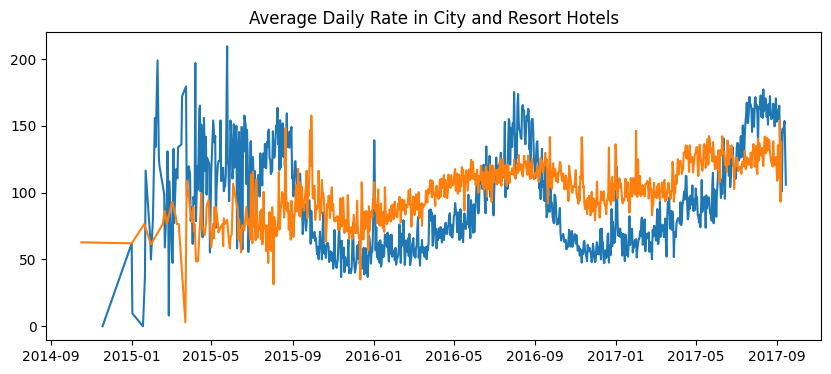

In [105]:
plt.figure(figsize = (10,4))
plt.title('Average Daily Rate in City and Resort Hotels')
plt.plot(resort_hotel.index, resort_hotel,label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel,label = 'City Hotel')
plt.show()

***The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days,it is even less. It goes without saying that weekends and hoildays may see a rise in resort hotel rates.***

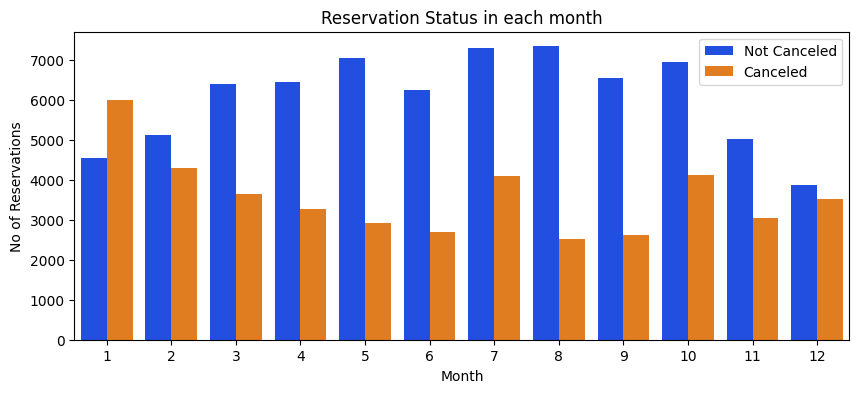

In [106]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(10,4))
ax1 = sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status in each month')
plt.xlabel('Month')
plt.ylabel('No of Reservations')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

***We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservations and the number of canceled reservations are largest in the month of august whereas January is the moth with the most canceled reservations.***

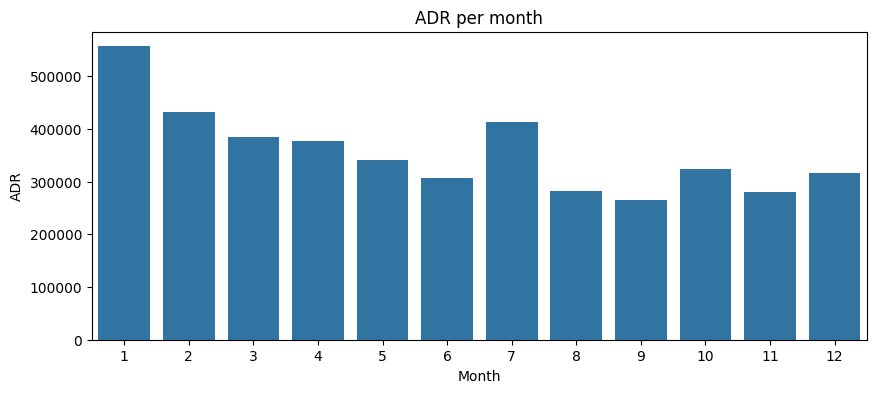

In [108]:
plt.figure(figsize = (10,4))
plt.title('ADR per month')
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

***This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest.Therefore,thecost of the accommodation is solely responsible for the cancellation.***



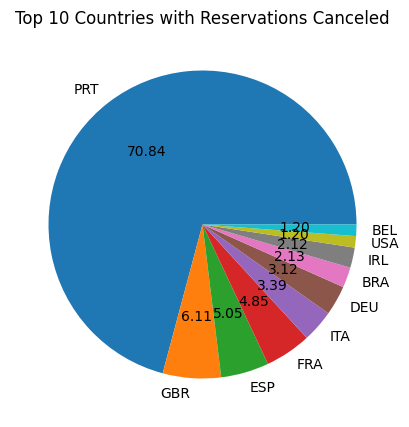

In [113]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (10,5))
plt.title('Top 10 Countries with Reservations Canceled')
plt.pie(top_10_country, labels = top_10_country.index, autopct = '%.2f')
plt.show()


***Now, let's see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.***

***Let's check the area from where guest are visiting the hotels and making reservations.Is it coming from Direct, Group,Online,Offline Travel Agents? Around 46% of the clients come from online travel agencies,whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations.***

In [81]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,53786
Offline TA/TO,24111
Groups,19712
Direct,11717
Corporate,5289
Complementary,743
Aviation,237
Undefined,2


In [84]:
df['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.465289
Offline TA/TO,0.208578
Groups,0.170523
Direct,0.101361
Corporate,0.045754
Complementary,0.006428
Aviation,0.002050
Undefined,0.000017


In [85]:
cancelled_data['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.456321
Groups,0.282049
Offline TA/TO,0.193919
Direct,0.041024
Corporate,0.023155
Complementary,0.002269
Aviation,0.001216
Undefined,0.000047


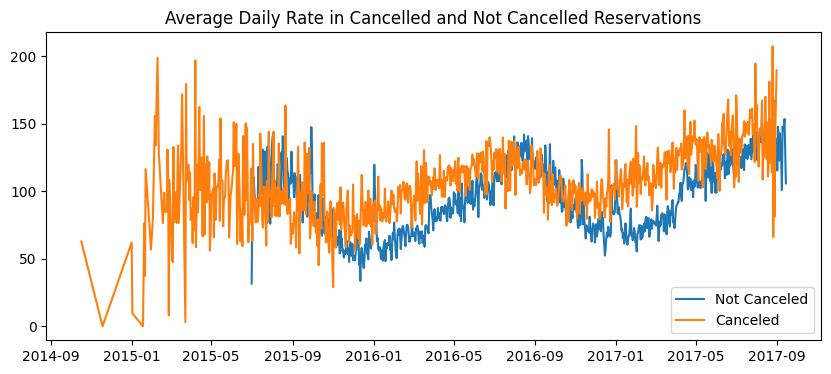

In [114]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean()
cancelled_df_adr = cancelled_df_adr.reset_index()
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_df_adr = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_df_adr.groupby('reservation_status_date')['adr'].mean()
not_cancelled_df_adr = not_cancelled_df_adr.reset_index()
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (10,4))
plt.title('Average Daily Rate in Cancelled and Not Cancelled Reservations')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'],label = 'Not Canceled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'],label = 'Canceled')
plt.legend()
plt.show()

In [91]:
filtered_df = df[(df['reservation_status_date'] >= '2016-01-01') & (df['reservation_status_date'] <= '2017-09-30')]

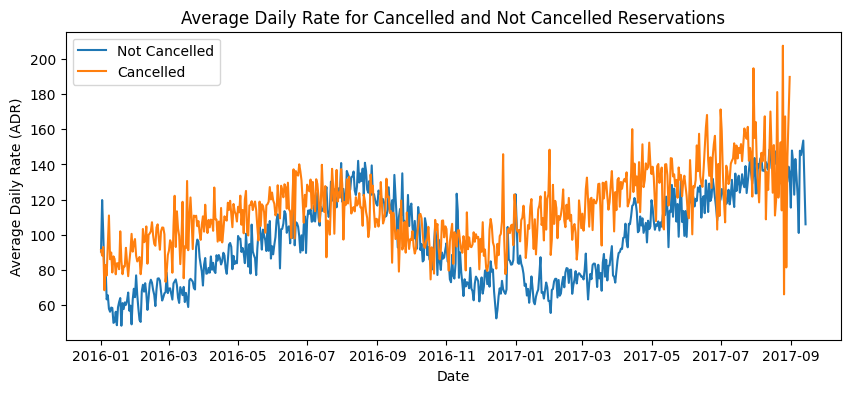

In [116]:
plt.figure(figsize=(10, 4))
plt.title('Average Daily Rate for Cancelled and Not Cancelled Reservations')

# Filter data for the specified date range
cancelled_df_filtered = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] >= '2016-01-01') & (cancelled_df_adr['reservation_status_date'] <= '2017-09-30')]
not_cancelled_df_filtered = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] >= '2016-01-01') & (not_cancelled_df_adr['reservation_status_date'] <= '2017-09-30')]

plt.plot(not_cancelled_df_filtered['reservation_status_date'], not_cancelled_df_filtered['adr'], label='Not Cancelled')
plt.plot(cancelled_df_filtered['reservation_status_date'], cancelled_df_filtered['adr'], label='Cancelled')

plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend()
plt.show()

***As seen in thhe graph, reservations are cancelled when the average daily rate is higher than when it is not canceled.It clearly proves all the above analysis,that the higher price leads to higher cancellation.***


***Suggestions***

***1.Cancellation rates rise as the price does. In order to prvent cancellations of reservations,hotel could work on their pricing strategies and try to lower the rates for specific hotels based on locations.They can also provide some discounts to the consumers.***

***2.As the ratio of the cancellation and not cancellation of the resort hotel in higher the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on hoildays.***

***3.In the month of January, hotels can start campaigns or making with a reasonable amount to increase their revenue as the cancellation is the highest in this month.***

***4.they can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.***
